<a href="https://colab.research.google.com/github/IngaKristin/Final-Project-TensorFlow/blob/vera-branch/dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important Links:**
- [Paper](https://arxiv.org/pdf/2011.13062.pdf)
- [GitHub](https://github.com/sfc-computational-creativity-lab/x-rhythm-can)

1. [Donwload](https://magenta.tensorflow.org/datasets/groove#format) the Groove MIDI Dataset
2. Mount the dataset to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pretty_midi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import re
import os
import pretty_midi
import joblib
import random

# **1. Dataset Info**

##### **1.1 Before loading the dataset, let's have a look at the `info.csv` file.**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TF-dataset/groove/info.csv')
df.head(5)

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test


In [ ]:
df.tail(5)

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
1145,drummer2,drummer2/session2,drummer2/session2/11,rock,130,beat,4-4,drummer2/session2/11_rock_130_beat_4-4.mid,NaN,1.909613,train
1146,drummer2,drummer2/session2,drummer2/session2/12,rock,130,beat,4-4,drummer2/session2/12_rock_130_beat_4-4.mid,NaN,1.808652,train
1147,drummer2,drummer2/session2,drummer2/session2/13,rock,130,beat,4-4,drummer2/session2/13_rock_130_beat_4-4.mid,NaN,1.864421,train
1148,drummer2,drummer2/session2,drummer2/session2/14,rock,130,beat,4-4,drummer2/session2/14_rock_130_beat_4-4.mid,NaN,1.875960,train
1149,drummer2,drummer2/session2,drummer2/session2/15,rock,130,beat,4-4,drummer2/session2/15_rock_130_beat_4-4.mid,NaN,3.714419,train


##### **1.2 Next, let's have a look at the column names and their meaning.**

In [ ]:
df.columns

Index(['drummer', 'session', 'id', 'style', 'bpm', 'beat_type',
       'time_signature', 'midi_filename', 'audio_filename', 'duration',
       'split'],
      dtype='object')

In [ ]:
df['style'].unique()

array(['funk/groove1', 'soul/groove10', 'funk/groove2', 'soul/groove3',
       'soul/groove4', 'funk/groove5', 'hiphop/groove6', 'pop/groove7',
       'rock/groove8', 'soul/groove9', 'funk', 'jazz/funk',
       'neworleans/secondline', 'dance/disco', 'funk/fast',
       'latin/brazilian-baiao', 'afrocuban', 'reggae', 'reggae/slow',
       'rock/halftime', 'funk/purdieshuffle', 'latin/samba', 'jazz',
       'rock/shuffle', 'jazz/mediumfast', 'jazz/fast', 'latin/reggaeton',
       'dance/breakbeat', 'neworleans/funk', 'latin/chacarera', 'country',
       'funk/rock', 'rock/prog', 'afrocuban/bembe', 'gospel',
       'afrocuban/rhumba', 'rock', 'punk', 'jazz/march', 'rock/folk',
       'afrobeat', 'latin/bomba', 'afrocuban/calypso', 'jazz/swing',
       'rock/rockabilly', 'jazz/linear', 'hiphop', 'jazz/klezmer',
       'latin/brazilian', 'blues/shuffle', 'latin/merengue',
       'latin/brazilian-bossa', 'latin/brazilian-sambareggae',
       'latin/brazilian-songo', 'middleeastern', 'latin/

In [ ]:
df_beat = df.drop(df[df['beat_type'] == 'fill'].index, inplace = False)
df_beat.head(5)

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test


**Column Description:**

`drummer:` a string ID for drummer of the performer. <br>
`session:` a string ID for each recording session (unique per drummer). <br>
`id:` a unique string ID for the performance. <br>
`style:` a string style for the performance formatted as `<primary>/<secondary>`. The primary style comes from the **Genre List** below. <br>
`bpm:` an integer tempo in beats per minute for the performance. <br>
`beat_type:` either “beat” or “fill”. <br>
`time_signature:` the time signature for the performance formatted as `<numerator>-<denominator>`. <br>
`midi_filename:` relative path to a MIDI file. <br>
`audio_filename:` relative path to the WAV file. <br>
`duration:` the float duration in seconds (of the MIDI). <br>
`split:` the predefined split: either "train", "validation" or "test". <br>

**Genre List:**

`afrobeat`,`afrocuban`,`blues`,`country`,`dance`,`funk`,`gospel`,`highlife`,`hiphop`

`jazz`,`latin`,`middleeastern`,`neworleans`,`pop`,`punk`,`reggae`,`rock`,`soul`

In [ ]:
#df.info

In [ ]:
train_data = df.loc[df['split'] == 'train']
train_data_count = train_data['split'].iloc[0:]

val_data = df.loc[df['split'] == 'validation']
val_data_count = val_data['split'].iloc[0:]

test_data = df.loc[df['split'] == 'test']
test_data_count = test_data['split'].iloc[0:]

In [ ]:
print(len(train_data_count), '\n')
print(len(val_data_count), '\n')
print(len(test_data_count))

897 

124 

129


In [ ]:
beat_data = df.loc[df['beat_type'] == 'beat'].count().iloc[7]
beat_data

503

In [ ]:
fill_data = df.loc[df['beat_type'] == 'fill'].count().iloc[7]
fill_data

647

# **2. Load the Dataset**

##### **2.1 Create a midi-to-drum mapping.**

In [ ]:
DRUM_CLASSES = [
   'Kick', 
   'Snare',
   'Hi-hat closed',
   'Hi-hat open',
   'Tom',
   'Tambourine/Timbale', 
   'Cymbal',
   'Percussion',
   'Clap',
]

In [ ]:
MIDI_DRUM_MAP = {
     36: 0,
     38: 1,
     40: 1,
     37: 1,
     48: 5,
     50: 6,
     45: 4,
     47: 5,
     43: 4,
     58: 4,
     46: 3,
     26: 3,
     42: 2,
     22: 2,
     44: 2,
     49: 7,
     55: 7,
     57: 7,
     52: 7,
     51: 8,
     59: 8,
     53: 8 
 }

In [ ]:
DRUM_MIDI_MAP = [ # pianoroll to MIDI - reverse
    36, # 0 Kick / Bass Drum 1
    40, # 1 Snare / Electric Snare
    42, # 2 Hihat Closed
    46, # 3 Hihat Open
    47, # 4 Tom  / Low-mid Tom
    66, # 5 Low Timbale
    51, # 6 Cymbal
    63, # 7 Percussion / Open Hi Conga
    39  # 8 Clap
]

In [ ]:
from glob import glob
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '0'

#filepaths = glob("./midi_dataset/groove/*/*/*beat_4-4.mid")
filepaths = glob("./midi_dataset/gm_reddit/GM MIDI Pack/GM - Electronic/*/*/*.mid")
#filepaths.extend(filepaths2)

print(len(filepaths))

# remove "fill" rhythms
filepaths = [path for path in filepaths if "fill" not in path]
print(len(filepaths))
GM_DRUMS = {
    35: "Acoustic Bass Drum",
    36: "Bass Drum 1",
    37: "Side Stick",
    38: "Acoustic Snare",
    39: "Hand Clap",
    40: "Electric Snare",
    41: "Low Floor Tom",
    42: "Closed Hi Hat",
    43: "High Floor Tom",
    44: "Pedal Hi-Hat",
    45: "Low Tom",
    46: "Open Hi-Hat",
    47: "Low-Mid Tom",
    48: "Hi-Mid Tom",
    49: "Crash Cymbal 1",
    50: "High Tom",
    51: "Ride Cymbal 1",
    52: "Chinese Cymbal",
    53: "Ride Bell",
    54: "Tambourine",
    55: "Splash Cymbal",
    56: "Cowbell",
    57: "Crash Cymbal 2",
    58: "Vibraslap",
    59: "Ride Cymbal 2",
    60: "Hi Bongo",
    61: "Low Bongo",
    62: "Mute Hi Conga",
    63: "Open Hi Conga",
    64: "Low Conga",
    65: "High Timbale",
    66: "Low Timbale",
    67: "High Agogo",
    68: "Low Agogo",
    69: "Cabasa",
    70: "Maracas",
    71: "Short Whistle",
    72: "Long Whistle",
    73: "Short Guiro",
    74: "Long Guiro",
    75: "Claves",
    76: "Hi Wood Block",
    77: "Low Wood Block",
    78: "Mute Cuica",
    79: "Open Cuica",
    80: "Mute Triangle",
    81: "Open Triangle"
}

0
0


In [ ]:
resolution  = 4 # separate quater into 4  = 16 notes per bar

nb_bars = 2 

len_seq = resolution * 4 * nb_bars # length of drumloops in training data - 2 bars
    
nb_notes = len(DRUM_CLASSES) # number of possible MIDI notes  - max_drum_note - min_drum_note

##### **2.2 Load the data and extract `.mid` files with only `beat`rythms.**

In [ ]:
filepaths = glob('/content/drive/MyDrive/TF-dataset/groove/*/*/*.mid')

print(len(filepaths))

# remove "fill" rhythms
beat_filepaths = [path for path in filepaths if "fill" not in path]
print(len(beat_filepaths))

1150
503


In [ ]:
beat_filepaths[0]

'/content/drive/MyDrive/TF-dataset/groove/drummer6/session2/1_rock_95_beat_4-4.mid'

##### **2.3 Extract the genres (number greater than 16) from filepaths names.**

**Now, we only keep `rock`, `funk`, `jazz`, `hiphop` genres.**

In [ ]:
def Genres(path):
  for beat_file in beat_filepaths:
    beat_file = path.split('/')[-1]
    beat_file = re.sub("[_]", "", beat_file)
    beat_file = re.sub('mid', '', beat_file)
    beat_file = re.sub("[0-9\n-.]", "", beat_file)
    beat_file = re.sub('beat', '', beat_file)
    return beat_file

In [ ]:
cleaned_genres = {}
for path in beat_filepaths:
  genre = Genres(path)
  if genre not in cleaned_genres:
    cleaned_genres[genre] = 1
  else:
    cleaned_genres[genre] += 1

In [ ]:
cleaned_genres

{'afro': 13,
 'afrocuban': 3,
 'afrocubanbembe': 1,
 'afrocubancalypso': 2,
 'afrocubanrhumba': 1,
 'bluesshuffle': 4,
 'country': 2,
 'dancebreak': 2,
 'dancedisco': 5,
 'dleeastern': 1,
 'funk': 36,
 'funkfast': 1,
 'funkgroove': 12,
 'funklatin': 2,
 'funkpurdieshuffle': 1,
 'funkrock': 1,
 'gospel': 1,
 'highlife': 2,
 'hiphop': 30,
 'hiphopgroove': 4,
 'jazz': 24,
 'jazzfast': 1,
 'jazzfunk': 2,
 'jazzfusion': 4,
 'jazzklezmer': 1,
 'jazzlinear': 2,
 'jazzmarch': 3,
 'jazzmediumfast': 2,
 'jazzswing': 11,
 'latin': 8,
 'latinando': 1,
 'latinbomba': 1,
 'latinbounce': 2,
 'latinbrazilian': 4,
 'latinbrazilianbaiao': 3,
 'latinbrazilianbossa': 2,
 'latinbrazilianfrevo': 1,
 'latinbrazilianijexa': 3,
 'latinbrazilianmaracatu': 2,
 'latinbraziliansamba': 5,
 'latinbraziliansambareggae': 3,
 'latinbraziliansongo': 5,
 'latinchacarera': 3,
 'latindominicanmerengue': 1,
 'latinmerengue': 1,
 'latinreggaeton': 1,
 'latinsamba': 2,
 'latinvenezuelanjoropo': 1,
 'latinvenezuelanmerengue': 

`rock` = 194

`funk` = 36

`jazz` = 24

`hiphop` = 30

In [ ]:
genres = []
for genre, nb in cleaned_genres.items():
  if nb > 16:
    genres.append(genre)
print(genres)

['rock', 'funk', 'jazz', 'hiphop']


In [ ]:
try:
    pm = pretty_midi.PrettyMIDI(path)
except:
    print("Failed to load midi: ", beat_filepaths)

**Example:**

In [ ]:
pretty_midi.PrettyMIDI('/content/drive/MyDrive/TF-dataset/groove/drummer6/session2/1_rock_95_beat_4-4.mid')

In [ ]:
pm.instruments

[Instrument(program=0, is_drum=True, name="Midi Drums")]

In [ ]:
def count_midi_note(path, all_notes, drum_notes):
  
  for instrument in pm.instruments:
    if instrument.is_drum == True or 1:
      for note in instrument.notes:
        if note.pitch in MIDI_DRUM_MAP:
          drum_note = MIDI_DRUM_MAP[note.pitch]
          if drum_note not in drum_notes:
            drum_notes[drum_note] = 1
          else:
            drum_notes[drum_note] += 1

        if note.pitch not in all_notes:
          all_notes[note.pitch] = 1
        else:
          all_notes[note.pitch] += 1
    else:
      print("not drum track!")
  return all_notes, drum_notes

In [ ]:
for target_genre in cleaned_genres:
  print(target_genre)
  all_notes = {}
  drum_notes = {}

  for path in beat_filepaths:
    genre = Genres(path)
    if genre not in cleaned_genres:
      print(genre)
    if target_genre == genre:
      all_notes, drum_notes = count_midi_note(path, all_notes, drum_notes)
  
  all_notes = {k: v for k, v in sorted(all_notes.items(), key=lambda item: item[1], reverse=True)}
  drum_notes = {k: v for k, v in sorted(drum_notes.items(), key=lambda item: item[1], reverse=True)}

  for i, m in enumerate(all_notes.keys()):
    if m in GM_DRUMS:
      print(m, GM_DRUMS[m], all_notes[m])
    else:
      print('midi %d is not in GM' % m)
    if i > 10:
      break
  print()

  for i, m in enumerate(drum_notes.keys()):
    print(DRUM_CLASSES[m], drum_notes[m])
                
  print()
  print()


rock
38 Acoustic Snare 5211
36 Bass Drum 1 2123
51 Ride Cymbal 1 1930
53 Ride Bell 386
58 Vibraslap 193
55 Splash Cymbal 193

Snare 5211
Clap 2316
Kick 2123
Tom 193
Percussion 193


soulgroove
38 Acoustic Snare 432
36 Bass Drum 1 176
51 Ride Cymbal 1 160
53 Ride Bell 32
58 Vibraslap 16
55 Splash Cymbal 16

Snare 432
Clap 192
Kick 176
Tom 16
Percussion 16


funkgroove
38 Acoustic Snare 324
36 Bass Drum 1 132
51 Ride Cymbal 1 120
53 Ride Bell 24
58 Vibraslap 12
55 Splash Cymbal 12

Snare 324
Clap 144
Kick 132
Tom 12
Percussion 12


rockgroove
38 Acoustic Snare 108
36 Bass Drum 1 44
51 Ride Cymbal 1 40
53 Ride Bell 8
58 Vibraslap 4
55 Splash Cymbal 4

Snare 108
Clap 48
Kick 44
Tom 4
Percussion 4


popgroove
38 Acoustic Snare 108
36 Bass Drum 1 44
51 Ride Cymbal 1 40
53 Ride Bell 8
58 Vibraslap 4
55 Splash Cymbal 4

Snare 108
Clap 48
Kick 44
Tom 4
Percussion 4


hiphopgroove
38 Acoustic Snare 108
36 Bass Drum 1 44
51 Ride Cymbal 1 40
53 Ride Bell 8
58 Vibraslap 4
55 Splash Cymbal 4

Snare 

**MIDI piano roll matrix**

In [ ]:
def plot_drum_matrix(a):
  if a is not None:
    a = np.transpose(np.squeeze(a))
    plt.matshow(a)
    plt.show()

1532 /content/drive/MyDrive/TF-dataset/groove/drummer1/session1/50_jazz_125_beat_4-4.mid
(60, 32, 9)
(60,)


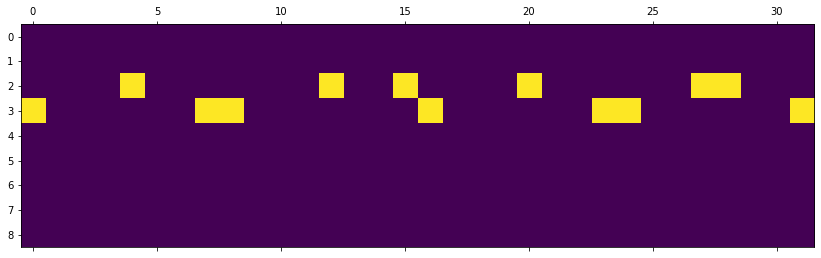

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.41666667  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.05        0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.  

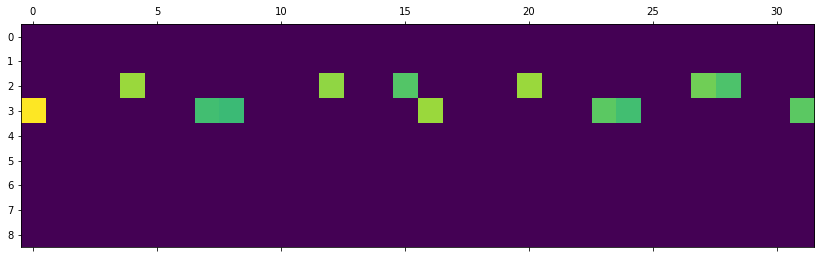

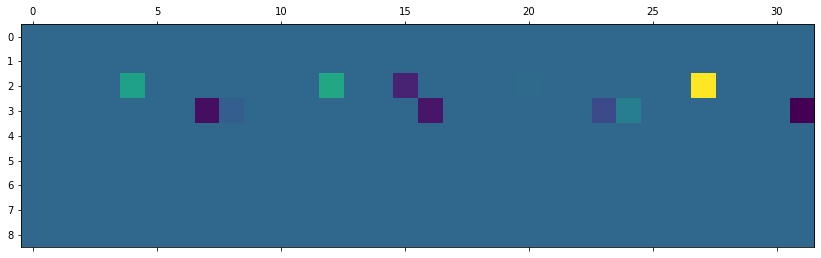

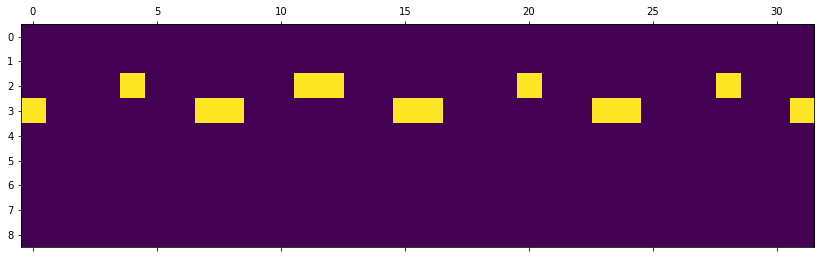

[[ 0.          0.          0.         -0.38333333  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.01666667  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.15        0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.13333333  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.  

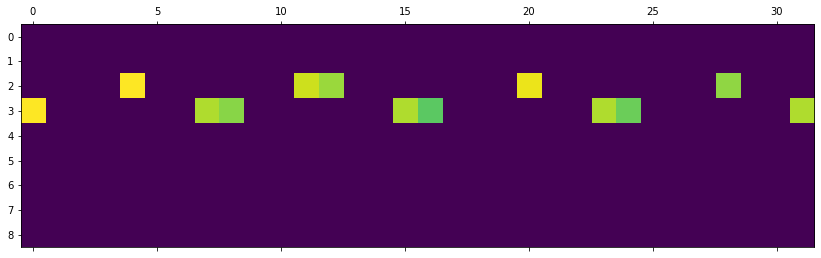

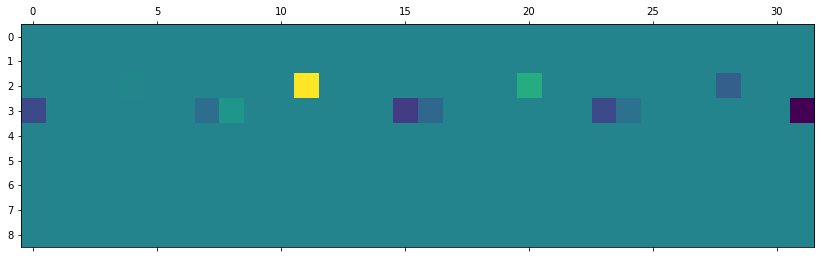

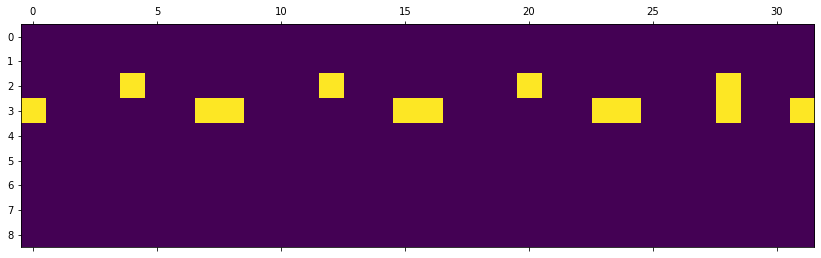

[[ 0.          0.          0.         -0.2         0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.28333333  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.38333333  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.13333333  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.  

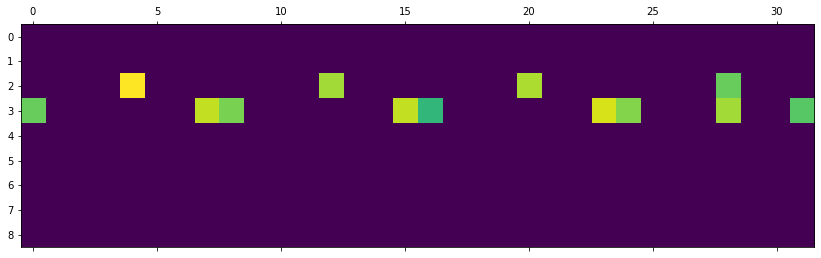

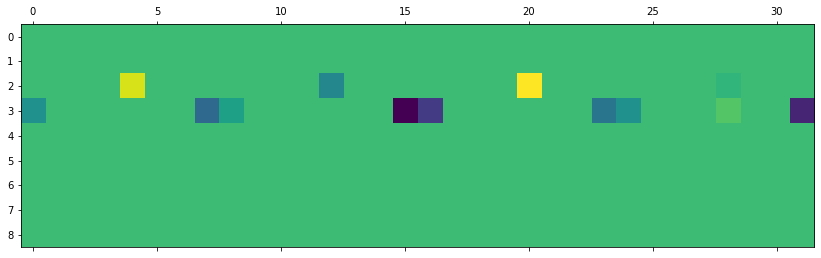

In [ ]:
# ignore drum loops with onsets less than MIN_NB_ONSETS
MIN_NB_ONSETS = 5

# unit timestamp = 16th note
def get_pianomatrices_of_drums(midi_file, is_drum=True):
  found = False
  genre_id = -1

  # is it in selected genres?
  genre = Genres(midi_file)
  if genre not in genres:
    return None
  genre_id = genres.index(genre)

  # load midi file
  try:
    pm = pretty_midi.PrettyMIDI(midi_file)
  except:
    print('Failed to load midi: ', midi_file)
    return None

  # get timiming of quater notes
  beats = pm.get_beats() 

  # get it to 16th notes
  beats_ticks = [] # converting to ticks

  for i in range((len(beats) + 1) * 4):
    beats_ticks.append(i * pm.resolution / 4)

  num_notes16 = len(beats_ticks)
  print(num_notes16, midi_file)

  # maximum duration of one note
  max_duration = 2.0 # 2 quarter notes

  # convert ticks to inde of 16th note
  def find_note_index(tick, beats_ticks):
    return (np.abs(beats_ticks - tick)).argmin()

  def get_offset(beats_ticks, grid_id, note_start):
    grid_start = beats_ticks[grid_id]
    tick_diff = note_start - grid_start
    tick_grid = pm.resolution / resolution * 0.5 # half of 15th note = 32nd note
    diff_coef = tick_diff / tick_grid # coef to a half of 16th note
    return diff_coef

  # # of notes
  notes_length = 4 * nb_bars * resolution

  # create pianoroll matrix (resolution: 16th note)
  onsets, velocities, timeshifts, durations, genre_ids = [], [], [], [], []

  for instrument in pm.instruments:
  # if instrument.is_drum == is_drum or 1:
        for note_start in range(0, num_notes16 - 16, 16): # hopsize = 1bar = 16 16th notes
            onset = np.zeros((notes_length, nb_notes), dtype='float') 
            velocity = np.zeros((notes_length, nb_notes), dtype='float') 
            timeshift = np.zeros((notes_length, nb_notes), dtype='float')
            duration = np.zeros((notes_length, nb_notes), dtype='float')

            for note in instrument.notes:
                idx_start = find_note_index(pm.time_to_tick(note.start), beats_ticks)
                diff_coef = get_offset(beats_ticks, idx_start, pm.time_to_tick(note.start))

                if note_start <= idx_start and idx_start < note_start + notes_length:
                    if note.pitch in MIDI_DRUM_MAP:
                        drum_note = MIDI_DRUM_MAP[note.pitch]

                        onset[idx_start - note_start, drum_note] = 1
                        velocity[idx_start - note_start, drum_note]  = note.velocity / 127.
                        timeshift[idx_start - note_start, drum_note] = diff_coef

                        dur = (pm.time_to_tick(note.end) - pm.time_to_tick(note.start))/ (pm.resolution / 4)
                        dur = min(1.0, max(0, dur / max_duration))
                        duration[idx_start - note_start, drum_note] = dur
                    else:
                        print("not found", note.pitch )

            if np.sum(onset > 0.) >= MIN_NB_ONSETS:
                # ignore the last part of the midi file where rhythm ends in the first bar
                if np.sum(onset[notes_length//2:,:]) > 0: 
                    onsets.append(onset)
                    velocities.append(velocity)
                    timeshifts.append(timeshift)
                    durations.append(duration)
                    genre_ids.append(genre_id)


  onsets = np.array(onsets)
  velocities = np.array(velocities)
  timeshifts = np.array(timeshifts)
  durations = np.array(durations)
  genre_ids = np.array(genre_ids)
    
  return (onsets, velocities, timeshifts, durations, genre_ids)
    
midi_file = random.choice(filepaths)
onsets, velocities, timeshifts, duration, genre_ids = get_pianomatrices_of_drums(midi_file)       

# sample
print(timeshifts.shape)
print(genre_ids.shape)

for i in range(min(3, len(onsets))):
    plot_drum_matrix(onsets[i])
    print(timeshifts[i])
    plot_drum_matrix(velocities[i])
    plot_drum_matrix(timeshifts[i])

**Batch processing**

In [ ]:
# Start creating piano-roll matrix
matrices_drums_list = joblib.Parallel(n_jobs=-1, verbose=1)(
   joblib.delayed(get_pianomatrices_of_drums)(midi_file, True)     
     for midi_file in beat_filepaths)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed: 116.6min
[Parallel(n_jobs=-1)]: Done 503 out of 503 | elapsed: 145.4min finished


In [ ]:
# clean up! 
matrices_drums_selected = [a for a in matrices_drums_list if a is not None]
matrices_drums_selected = [a for a in matrices_drums_selected
                           if (a[0].shape[0] == a[1].shape[0] and a[1].shape[0] == a[2].shape[0] and a[2].shape[0] == a[3].shape[0] and a[0].shape[0]>0)]

matrices_drums_ = [a[0] for a in matrices_drums_selected] # if a is not None and len(a[0].shape)==3 and a[3].shape[0] == a[0].shape[0]]
matrices_velos_ = [a[1] for a in matrices_drums_selected]
matrices_times_ = [a[2] for a in matrices_drums_selected] # if a is not None and len(a[1].shape)==3 and a[3].shape[0] == a[0].shape[0]]
matrices_durations_ = [a[3] for a in matrices_drums_selected] #if a is not None and len(a[2].shape)==3 and a[3].shape[0] == a[0].shape[0]]
matrices_genre_ids_ = [np.squeeze(a[4]) for a in matrices_drums_selected] #if a is not None and a[3].ndim==1 and a[3].shape[0] == a[0].shape[0]]

matrices_drums = np.vstack(matrices_drums_)
print(matrices_drums.shape)

matrices_velos = np.vstack(matrices_velos_)
print(matrices_velos.shape)

matrices_times = np.vstack(matrices_times_)
print(matrices_times.shape)

matrices_durations = np.vstack(matrices_durations_)
print(matrices_durations.shape)

matrices_genre_ids = np.hstack(matrices_genre_ids_)
print(matrices_genre_ids.shape)

(8614, 32, 9)
(8614, 32, 9)
(8614, 32, 9)
(8614, 32, 9)
(8614,)


In [ ]:
# store data
np.savez("/content/drive/MyDrive/matrices_drum_gm_clean.npz", onsets=matrices_drums, velocities=matrices_velos, offsets=matrices_times,
         durations=matrices_durations, genre_ids=matrices_genre_ids, genres_=genres)

In [ ]:
import numpy as np

matrices_onsets = np.load("/content/drive/MyDrive/matrices_drum_gm_clean.npz")['onsets']
matrices_velos = np.load("/content/drive/MyDrive/matrices_drum_gm_clean.npz")['velocities']
matrices_offsets = np.load("/content/drive/MyDrive/matrices_drum_gm_clean.npz")['offsets']
matrices_genres = np.load("/content/drive/MyDrive/matrices_drum_gm_clean.npz")['genre_ids']

#GENRES = np.load("/content/drive/MyDrive/matrices_drum_gm_clean.npz")['genres']
#NB_GENRES = len(GENRES)

#print(genres)

In [ ]:
!apt install fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libqt5x11extras5 qsynth
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libqt5x11extras5 amd64 5.9.5-0ubuntu1 [8,596 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 qsynth amd64 0.5.0-2 [191 kB]
Fetched 120 MB in 12s (9,902 kB/s)
Selecting previously unselected package fluid-soundf

In [ ]:
!pip install pyfluidsynth

In [ ]:
!sudo apt-get install fluidsynth
!pip install pyfluidsynth -U

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.9-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install mido==1.2.9

     |████████████████████████████████| 52 kB 819 kB/s 
  Attempting uninstall: mido
    Found existing installation: mido 1.2.10
    Uninstalling mido-1.2.10:
      Successfully uninstalled mido-1.2.10


In [ ]:
from mido import MidiFile

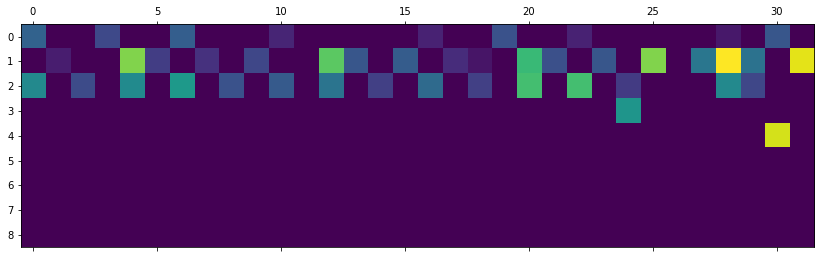

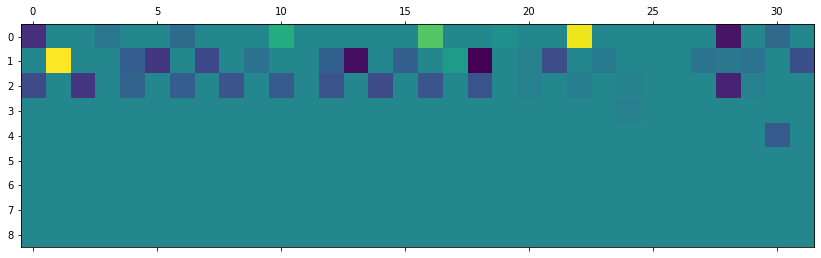

playback without timing offset


ImportError: ignored

In [ ]:
import pretty_midi
import random
from IPython.display import Audio
import fluidsynth

def play_drum_matrix(mat, offsets=None, tempo=120.0):
    # generate audio
    audio_data = get_audio_from_drum_matrix(mat, offsets=offsets, tempo=tempo)
    display(Audio(audio_data, rate=44100))
    return audio_data

def get_audio_from_drum_matrix(velocities, offsets=None, tempo=120.):
    pm = pretty_midi.PrettyMIDI(initial_tempo=tempo) # midi object
    pm_inst = pretty_midi.Instrument(0, is_drum=True) # midi instrument
    
    timestep = (60./tempo) / 4. # duration of a 16th note
    offset_unit = timestep / 2. # max offset == 32nd note
    
    for position, timeslot in enumerate(velocities):
        for inst, onset in enumerate(timeslot):
            if onset > 0.:
                note_number = DRUM_MIDI_MAP[inst]
                velocity = int(onset * 127.)
                
                offset = 0
                if offsets is not None:
                    offset = offsets[position, inst] * offset_unit

                start = timestep * position + offset
                end = timestep * (position + 0.5) + offset # duration doesn't matter much for rhythm track
                
                # create a midi note
                note = pretty_midi.Note(velocity=velocity, pitch=note_number, start=start, end=end)
                pm_inst.notes.append(note)
    pm.instruments.append(pm_inst)

    # midi -> audio
    audio_data = pm.fluidsynth()
    return audio_data

# Visualize / Sonification
for _ in range(5):
    index = random.randint(0, len(matrices_velos))
    mat = matrices_velos[index]
    offset = matrices_offsets[index]

    plot_drum_matrix(mat)
    plot_drum_matrix(offset)
    
    print("playback without timing offset")
    audio_data = play_drum_matrix(mat, offsets=None, tempo=100.)
    print("playback with timing offset")
    audio_data = play_drum_matrix(mat, offsets=offset, tempo=100.)

#     from scipy.io import wavfile
#     wavfile.write("drum.wav", 44100, audio_data)